**Q1**. A pulse tracer input into a PFR showed the following outlet concentration:

The experimental data between 2 and 4 min were fit into the line equation $C_{out} = -2t+17$, with $C_{out}$ in $[mM]*$ and $t$ in $[min]$.

    a) Find the RTD function.
    b) Find mean residence time.
    c) Find variance.
    d) What is the fraction of material that spends in the reactor 3 minutes and longer?
* [M] means [mol/L] – it is a molar concentration in a fluid (gas or liquid)
![Q1.png](Q1.png)

Text(0.5, 0, 'Concentration, mM')

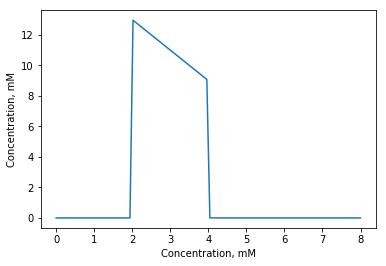

In [3]:
import numpy as np
t=np.linspace(0.,8.,100)
C=np.zeros(len(t))

for i in range(0,len(t)):
    if 0<t[i]<2: 
        C[i]=0
    elif 2<=t[i]<=4:
        C[i]=-2*t[i]+17
    else:
        C[i]=0

        
import matplotlib.pyplot as plt
plt.plot(t,C)
plt.ylabel('Concentration, mM')
plt.xlabel('Concentration, mM')

In [31]:
t

array([0.00000000e+00, 8.00080008e-04, 1.60016002e-03, ...,
       7.99839984e+00, 7.99919992e+00, 8.00000000e+00])

$\int_0^\infty C(t)dt=0+\int_2^4(-2*t+17)dt+0=-2\int_2^4tdt+17\int_2^4dt=22$

In [87]:
import numpy as np
import scipy.integrate as integrate

t=np.linspace(0.,8.,10000)
C=np.zeros(len(t))

for i in range(0,len(t)):
    if 0<t[i]<2: 
        C[i]=0
    elif 2<=t[i]<=4:
        C[i]=-2*t[i]+17
    else:
        C[i]=0

I = integrate.cumtrapz(C, t, initial=0) 
print ("{0:.3f}".format(I[len(I)-1]))


$\int_0^\infty C(t)dt$22.003


RTD function : $E(t)=\frac{C(t)}{\int_0^\infty C(t)dt}$

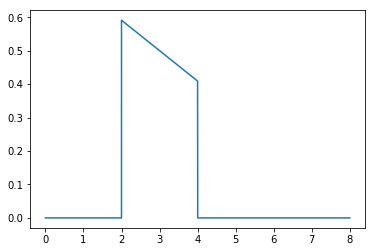

In [15]:
import numpy as np
import matplotlib.pyplot as plt
E=np.zeros(len(t))

for i in range(0,len(t)):
#    if 0<t[i]<2: 
#        E[i]=0
#    elif 2<=t[i]<=4:
#        E[i]=(-2*t[i]+17)/22
#    else:
#        E[i]=0

     E[i]=C[i]/I[len(I)-1]
E        
plt.plot(t,E)

**b**. Mean residence time
$\bar{t}=\int_0^\infty tE(t)dt=0+\int_2^4 tE(t)dt+0=\int_2^4(t\frac{-2t+17}{22})dt=-\frac{2}{22}(\frac{4^3}{3}-\frac{2^3}{3})+\frac{17}{22}(\frac{4^2}{2}-\frac{2^2}{2})=2.9 min$

In [16]:
t_r=np.zeros(len(t))
for i in range(0,len(t)):
    t_r[i]=t[i]*E[i]

    
tr = integrate.trapz(t_r, t)


print ("mean residence time ={0:.3f}".format(tr))

mean residence time =2.939


**c**. Find the varience

$\sigma^2=\int_0^\infty t^2E(t)dt-\bar{t}^2=\int_2^4 t^2(\frac{-2t+17}{22})dt-2.9^2=\frac{-1}{11}(\frac{4^4}{4}-\frac{2^4}{4})+\frac{17*4^3}{22*3}-\frac{17*2^3}{22*3}-2.9^2=0.56 min^2$

In [17]:
v=np.zeros(len(t))

for i in range(0,len(t)):
    v[i]=t[i]*t[i]*E[i]
    

Va = integrate.trapz(v, t)
print(Va)
print(tr)
Var=Va-(2.9*2.9)
Var1=Va-(tr*tr)
print ('Varience of residence times =', Var1, 'min^2', Var)

8.969109601086757
2.9392829183001035
Varience of residence times = 0.3297255272759845 min^2 0.5591096010867567


**d**. Fraction of the material spends in the reactor longer than 3 min.

Use cummulative distribution function, $F(t)=\int_0^t E(t) dt$.

$1-F(t)$?

$F(3)=\int_0^3 t dt+ \frac{17}{22}\int_2^3 dt=\frac{-2}{22}(\frac{3^2}{2}-\frac{2^2}{2})+\frac{17}{22}(3-2)=0.545$

1-F(3)=0.455

Fraction spends in the reactor less than 3 min = 0.5448581920338935
Fraction spends in the reactor greater than 3 min = 0.4551418079661065


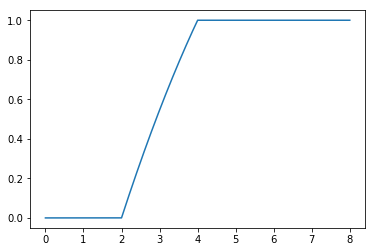

In [89]:
y=np.zeros(len(t))


for i in range (2,len(t)+1):
        y[i-1]=integrate.trapz(E[0:i],t[0:i])
    
k=0


plt.plot(t,y)

for i in range(0,len(t)):
    if 2.99 < t[i] < 3.00:
        k=i

#print(k)
    
print ('Fraction spends in the reactor less than 3 min =', y[k-1]) 
print ('Fraction spends in the reactor greater than 3 min =', 1-y[k-1])

**Q2**. Residence time distribution in real reactors and its characteristics. *From Chapter 13, 4th Ed. Fogler*


The following data were obtained from a pulse tracer test to a real flow reactor:

|t(s)|0|5|10|15|20|25|30|35|
|----|--|--|---|--|--|--|--|--|
|C(mg/dm^3)|0|0|0|5|10|5|0|0|

    a) Plot RTD function
    b) Find the fraction of material that spends between 15 and 20 seconds in the reactor
    c) Plot cumulative distribution function F(t)
    d) What fraction of the material spends 25 seconds or less in the reactor?
    e) Find mean residence time.

**a**. RTD function is $E(t)=\frac{C(t)}{\int_0^\infty C(t) dt}$

To find the total concentration in the denominator, we plot $C(t)$ vs. time and evaluate the area:
![Q2.png](Q2.png)

Text(0.5, 0, 'Time, s')

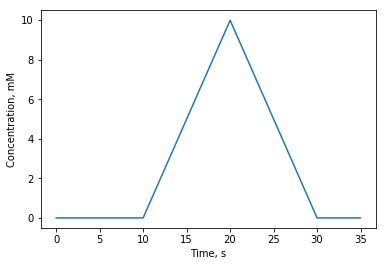

In [90]:
t2=np.linspace(0.,35,1000)
C2=np.zeros(len(t2))

for i in range(0,len(t2)):
    if 0<t2[i]<10: 
        C2[i]=0
    elif 10<=t2[i]<20:
        C2[i]=t2[i]-10
    elif 20<=t2[i]<=30:
        C2[i]=30-t2[i]
    else:
        C2[i]=0

import matplotlib.pyplot as plt
plt.plot(t2,C2)
plt.ylabel('Concentration, mM')
plt.xlabel('Time, s')

In [61]:
I2 = integrate.cumtrapz(C2, t2, initial=0) 
print ("The total concentration in denominator ={0:.3f}".format(I[len(I)-1]), 'mg.s/dm^3')

The total concentration in denominator =99.990 mg.s/dm^3


RTD function is  $𝐸(𝑡)=𝐶(𝑡)\int_0^\infty 𝐶(𝑡)𝑑𝑡$

Text(0.5, 0, 'Time, s')

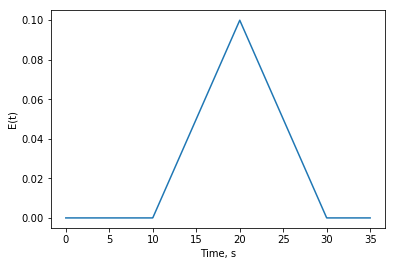

In [84]:
import numpy as np
import matplotlib.pyplot as plt
E2=np.zeros(len(t2))

for i in range(0,len(t2)):

     E2[i]=C2[i]/I2[len(I2)-1]
E2        
plt.plot(t2,E2)
plt.ylabel('E(t)')
plt.xlabel('Time, s')

**b**.$\int_{15}^{20} E(t) dt$

Fraction spends in the reactor between 15-20 mins =0.371


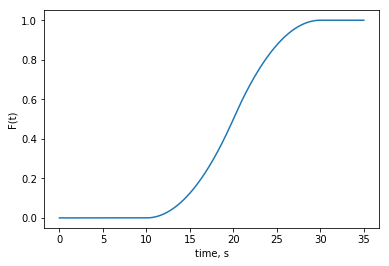

In [83]:
y2=np.zeros(len(t2))


for i in range (2,len(t2)+1):
        y2[i-1]=integrate.trapz(E2[0:i],t2[0:i])
    
k2=0
k22=0

plt.plot(t2,y2)
plt.ylabel('F(t)')
plt.xlabel('Time, s')

for i in range(0,len(t2)):
    if 14.84 < t2[i] < 15.00:
        k2=i
    if 19.79 < t2[i] < 20.00:
        k22=i

#print(k2)
#print(k22)
#print(y2[k2-1])
#print(y2[k22-1])
    
print ("Fraction spends in reactor between 15-20 mins ={0:.3f}".format(y2[k22-1]-y2[k2-1]))


In [80]:
k3=0
k33=0

for i in range(0,len(t2)):
    if 9.98 < t2[i] < 10.00:
        k3=i
    if 14.99 < t2[i] < 15.00:
        k33=i

#print(k3)
#print(k33)
#print(y2[k3-1])
#print(y2[k33-1])
#print(y2[k33-1]-y2[k3-1])
print ("Fraction spends in the reactor between 10-15 mins ={0:.3f}".format(y2[k33-1]-y2[k3-1]))


Fraction spends in the reactor between 10-15 mins =0.123


In [81]:
k4=0
k44=0

for i in range(0,len(t2)):
    if 9.98 < t2[i] < 10.00:
        k4=i
    if 19.96 < t2[i] < 20.00:
        k44=i

#print(k4)
#print(k44)
#print(y2[k4-1])
#print(y2[k44-1])
#print(y2[k44-1]-y2[k4-1])
print ("Fraction spends in the reactor between 10-20 mins ={0:.3f}".format(y2[k44-1]-y2[k4-1]))


Fraction spends in the reactor between 10-20 mins =0.494


In [82]:
k5=0
k55=0

for i in range(0,len(t2)):
    if 9.98 < t2[i] < 10.00:
        k5=i
    if 24.97 < t2[i] < 25.00:
        k55=i

#print(k5)
#print(k55)
#print(y2[k5-1])
#print(y2[k55-1])
#print(y2[k55-1]-y2[k5-1])
print ("Fraction spends in the reactor between 10-25 mins ={0:.3f}".format(y2[k55-1]-y2[k5-1]))


Fraction spends in the reactor between 10-25 mins =0.872


**e**. mean residence time. $\bar{t}=\int_0^\infty t. E(t) dt$

mean residence time =20.000 s


Text(0.5, 0, 'time, s')

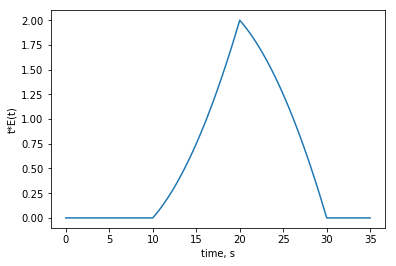

In [74]:
t_r2=np.zeros(len(t2))
for i in range(0,len(t2)):
    t_r2[i]=t2[i]*E2[i]

    
tr2 = integrate.trapz(t_r2, t2)


print ("mean residence time ={0:.3f}".format(tr2), 's')
plt.plot(t2,t_r2)
plt.ylabel('t*E(t)')
plt.xlabel('time, s')